# Desafio Stanford

Envolver a detecção de diferenças em circuitos impressos falhos a circuitos impressos sem problemas (PCBs) para identificar defeitos. Além de detectar movimento em um video.
Este projeto utiliza bibliotecas como NumPy, SciPy e OpenCV.

## Descrição

A ideia é:

**PCB**
- Comparar duas imagens (PCB original e defeituosa).
- Identificar diferenças nas duas imagens.
- Aplicar um threshold para destacar essas diferenças e ignorar pequenas variações.

**Video**
- Detectar movimentos em um video
- Realizar um pré-processamento no video
- Comparar frame onde tem apenas o fundo com cada frame do video
- Mostrar o resultado da comparação

## Código

- **PCB**

    - **Subtração**

        Calcula a diferença absoluta entre os valores de pixels de duas imagens, pois a diferença absoluta destaca discrepâncias, independentemente de qual imagem tem maior intensidade em um pixel:
        
        ```math
        \text{resultado}(x, y) = |\text{img1}(x, y) - \text{img2}(x, y)|
        ```

        ```python
        def subtrair(img1, img2):
            npImg1 = np.array(img1)
            npImg2 = np.array(img2)

            return np.abs(npImg1 - npImg2)
        ```

    - **Threshold**

        Aplica um limiar (threshold) aos valores de pixels, de forma a tranformar a imagem antes com diversos tons em uma imagem binaria:

        ```
        valor < threshold = 0
        valor >= threshold = 255
        ```

        ```python
        def threshold(img, value):
            npImg = np.array(img)
            npImg[npImg < value] = 0
            npImg[npImg >= value] = 255

            return Image.fromarray(npImg)
        ```

    ### Código final PCB
    

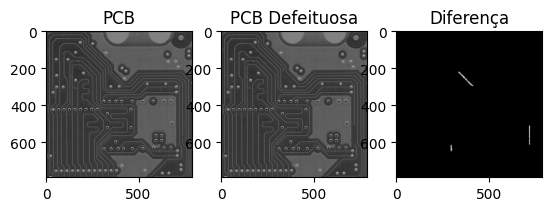

In [2]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, img2, img3, txt1, txt2, txt3):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(txt2)
    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title(txt3)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def subtrair(img1, img2):
    npImg1 = np.array(img1)
    npImg2 = np.array(img2)

    return np.abs(npImg1 - npImg2)

def threshold(img, value):
    npImg = np.array(img)
    npImg[npImg < value] = 0
    npImg[npImg >= value] = 255

    return Image.fromarray(npImg)

def diferenca(img1, img2, th=50):
    return threshold(subtrair(img1, img2), th)

def main():
    pcb = Image.open('imgs/pcb.png')
    pcbDefected = Image.open('imgs/pcbDefected.png')
    
    dif = diferenca(pcb, pcbDefected, 20)
    plot(pcb, pcbDefected, dif, "PCB", "PCB Defeituosa", "Diferença")
    
if __name__ == "__main__":
    main()


## Código

- **Video**

    - **Pré-processamento**

        - **Escala de Cinzas(Grayscale)**

            Converte todos os quadros para tons de cinza. Isso reduz a complexidade e foca na intensidade dos pixels.

            ```python
            def grayscale(video):
                frames = []

                for frame in video:
                    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

                return frames
            ```

        - **Equalização**

            Equaliza o histograma de cada quadro para melhorar o contraste, especialmente em condições de iluminação variada.
            
            ```python
            def equalizar_frame(frame):
                return cv2.equalizeHist(frame)
            ```

        - **Nomalização**

            Normaliza os valores de intensidade dos quadros entre 0 e 255, garantindo consistência.
            
            ```python
            def normalizar_frame(frame):
                return cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)
            ```
    
    - **Detecção de movimento**

        - **Diferença**

            Combina subtração e limiarização para gerar uma imagem binária que destaca diferenças.
            
            ```python
            def diferenca(img1, img2, th=50):
                return threshold(subtrair(img1, img2), th)
            ```
        
    - **Carregamento e exibição**

        - **Carregar Video**
            Carrega um vídeo usando OpenCV
            
            ```python
            def carregarVideo(path):
                vid = cv2.VideoCapture(path)

                if not vid.isOpened():
                    print("Erro ao abrir o vídeo")
                    exit()

                return vid
            ```

        - **Frames**
            Extrai todos os quadros do vídeo e os armazena em uma lista.
            
            ```python
            def getFrames(vid):
                frames = []

                while True:
                    ret, frame = vid.read()

                    if not ret:
                        break

                    frames.append(frame)

                return frames
            ```
        
        - **Mostrar Video**
            Mostra cada quadro do vídeo processado.
            
            ```python
            def mostrarVideo(video):
                for frame in video:
                    cv2.imshow('frame', frame)
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break

                cv2.destroyAllWindows()
            ```

    ### Código final Video

In [1]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(img, cmap='gray')
    ax.set_title("debug")

    plt.show()

def debug(img, img2, img3, txt1, txt2, txt3):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(txt2)
    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title(txt3)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'5-Desafio Stanford/imgs/{nome}{time}.png')

def carregarVideo(path):
    vid = cv2.VideoCapture(path)

    if not vid.isOpened():
        print("Erro ao abrir o vídeo")
        exit()

    return vid

def grayscale(video):
    frames = []

    for frame in video:
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

    return frames

def getFrames(vid):
    frames = []

    while True:
        ret, frame = vid.read()

        if not ret:
            break

        frames.append(frame)

    return frames


def salvarVideo(video, nome):
    pasta = '5-Desafio Stanford/videos/'

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'{pasta}{nome}.mp4', fourcc, 40.0, (video[0].shape[1], video[0].shape[0]), isColor=True)

    for frame in video:
        if len(frame.shape) == 2:  
            frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  
        out.write(frame)

    out.release()

def mostrarVideo(video):
    for frame in video:
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()

def subtrair(img1, img2):
    npImg1 = np.array(img1)
    npImg2 = np.array(img2)

    #debug(npImg1, npImg2, np.abs(npImg1 - npImg2), "img1", "img2", "dif")

    return np.abs(npImg1 - npImg2)

def threshold(img, value):
    img[img < value] = 0
    img[img >= value] = 255

    return img

def diferenca(img1, img2, th=50):
    return threshold(subtrair(img1, img2), th)

def difVideo(video, background, th=50):
    frames = getFrames(video)
    frames = grayscale(frames)
    #frames = aplicar_equalizacao(frames)
    frames = aplicar_normalizacao(frames)
    #mostrarVideo(frames)

    #frames = medias(frames)
    #background = np.array(background)
    
    #salvar(Image.fromarray(mediaFrames(frames, 200)), 'media')

    for i in range(len(frames)):
        frames[i] = diferenca(background, frames[i], th)

    frames = medianas(frames)
    return frames

def matrizMedia(size):
    if((size % 2) == 0):
        size += 1
    if(size < 3):
        size = 3
    return np.full((size, size), 1/(size*size))

def convolucao(imagem, matriz):
    img = np.array(imagem)
    return cv2.filter2D(img, -1, matriz)

def media(imagem):
    return convolucao(imagem, matrizMedia(3))

def medias(frames):
    newFrames = []

    for frame in frames:
        newFrames.append(media(frame))

    return newFrames

def equalizar_frame(frame):
    return cv2.equalizeHist(frame)

def aplicar_equalizacao(frames):
    return [equalizar_frame(frame) for frame in frames]

def mediaFrames(frames, N):
    if N > len(frames):
        N = len(frames)
    
    sum_frames = np.zeros_like(frames[0], dtype=np.float32)
    
    for i in range(N):
        sum_frames += frames[i].astype(np.float32)
    
    avg_frame = (sum_frames / N).astype(np.uint8)
    
    return avg_frame

def mediana(frame):
    return cv2.medianBlur(frame, 7)

def medianas(frames):
    newFrames = []

    for frame in frames:
        newFrames.append(mediana(frame))

    return newFrames

def normalizar_frame(frame):
    return cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)

def aplicar_normalizacao(frames):
    return [normalizar_frame(frame) for frame in frames]

def main():
    video = carregarVideo('videos/surveillance.avi')
    background = Image.open('imgs/background.png')
    #background = media(background)
    #background = equalizar_frame(np.array(background))
    #background = normalizar_frame(np.array(background))

    newVideo = difVideo(video, background, 211)

    mostrarVideo(newVideo)
    salvarVideo(newVideo, 'movimento')

    video.release()


if __name__ == "__main__":
    main()
